# Tutorial: Dilation-based array grouping
For residential solar PV projects, each household often installs multiple solar PV panels as a group which we termed as an **array**. With traditional object-wise evaluation in computer vision literature, each panel would be evaluated individually. However, evaluting at panel-level doesn't tell how many arrays are accurately identified and how much solar PV is installed for each household in terms of area.

Therefore, we propose an array-wise evaluation instead of panel-wise evaluation. To perform the array-wise evaluation, we first apply a dilation-based grouping technique to group detected panels into arrays based on how close they're to each other. Here's the technical tutorial on how such technique works under the hood.

In [18]:
from skimage import measure, io
from skimage.morphology import disk, dilation
import numpy as np
import matplotlib.pyplot as plt

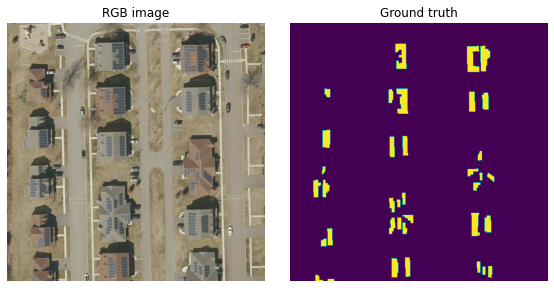

In [13]:
# Take a sub-region of one image tile as an example

rgb = io.imread('180695_ne.jpg')[500:1000, 800:1300]
lbl = io.imread('180695_ne.png')[500:1000, 800:1300]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(rgb)
ax[0].axis('off')
ax[0].set_title('RGB image')

ax[1].imshow(lbl)
ax[1].axis('off')
ax[1].set_title('Ground truth')

plt.tight_layout()
plt.show()

As shown above, mose of these residential homes have multiple solar PV panels installed on their roofs.

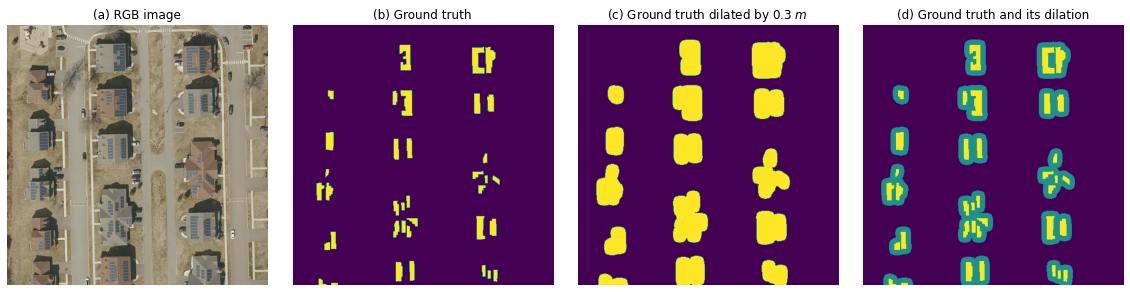

In [16]:
lbl_dilated = dilation(lbl, disk(10)) # Add a 10-px disk dilation on the ground truth mask, 10 px is 0.3 m
lbl_overlay = lbl+lbl_dilated

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].imshow(rgb)
ax[0].axis('off')
ax[0].set_title('(a) RGB image')

ax[1].imshow(lbl)
ax[1].axis('off')
ax[1].set_title('(b) Ground truth')

ax[2].imshow(lbl_dilated)
ax[2].axis('off')
ax[2].set_title('(c) Ground truth dilated by 0.3 $m$')

ax[3].imshow(lbl_overlay)
ax[3].axis('off')
ax[3].set_title('(d) Ground truth and its dilation')

plt.tight_layout()
plt.show()

In the dilated ground truth map (c), we can see that the groups of panels, which are located closely but separately, are now connected to each other.

Next, we overlay (b) and (c) to get (d). Panel pixels (yellow in (d)) which falls into the same group of connected dilated pixels (green in (d)) are put into one group to make an array.

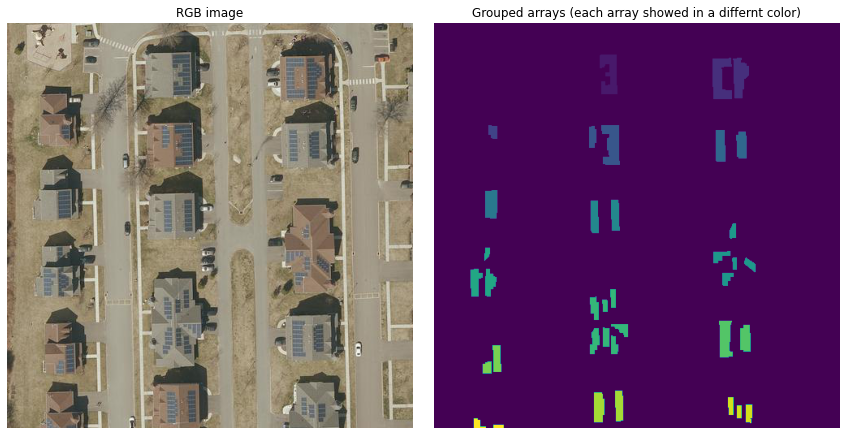

In [32]:
lbl_dilated_label = measure.label(lbl_dilated)
lbl_grouped = np.multiply(lbl, lbl_dilated_label)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(rgb)
ax[0].axis('off')
ax[0].set_title('RGB image')

ax[1].imshow(lbl_grouped)
ax[1].axis('off')
ax[1].set_title('Grouped arrays (each array showed in a differnt color)')

plt.tight_layout()
plt.show()

In [25]:
np.unique(lbl_grouped)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

As shown above, panels are now grouped into arrays and the algorithm worked perfectly that everything on the same roof was grouped into one array. There area 16 unique values in the final array where `0` stands for background and `1-15` are 15 individual arrays.